In [2]:
# This is a code which demonstrates a simple Neural Network for MNIST Dataset from Scratch without using Tensorflow or Pytorch. Purely using numpy.
# I have included the comments everywhere to understand the relationship between the mathematical aspects and the equations involved in the code (These comments were manually written by me for understanding)
#Imports
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Fetch the MNIST dataset
#return_X_Y = True means it will return the feature matrix, kind of a pixel data and y kinda returns the different digits from 0-9
#as_frame = False means it will return it as a numpy arrays rather than pandas dataframes since we are implementing a Neural Network using Numpy.
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)




In [4]:
print(X.shape) # The Dataset contains 70000 images and each image is of 28 x 28 pixels therefore 28 x 28 = 784 pixels flattened therefore shape (70000, 784)
print(y.shape) # There are 70000 labels, one for each image therefore shape (70000,)


(70000, 784)
(70000,)


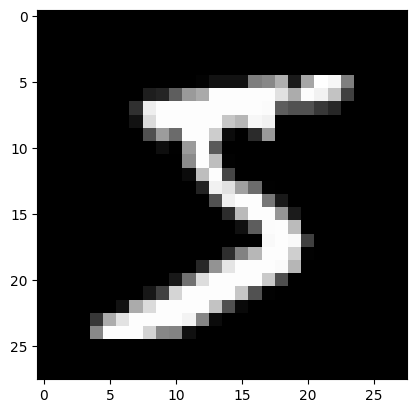

In [5]:
# Prints the first image of the dataset
import matplotlib.pyplot as plt

image = X[0].reshape(28,28)
plt.imshow(image, cmap = "grey")
plt.show()

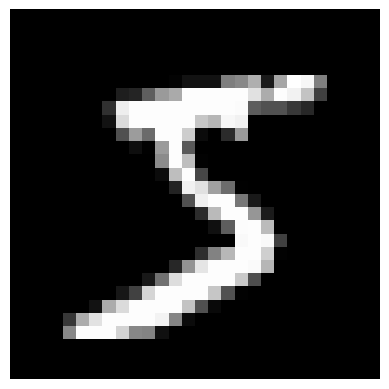

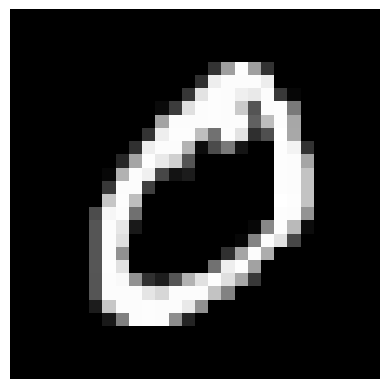

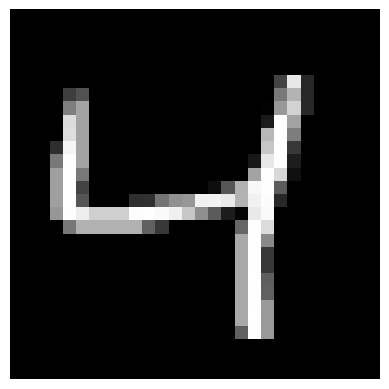

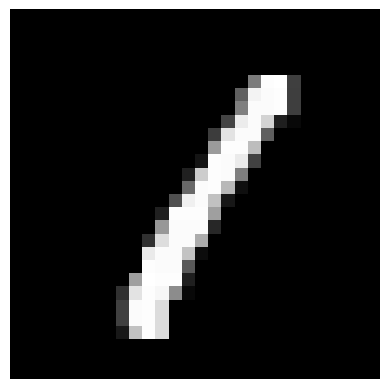

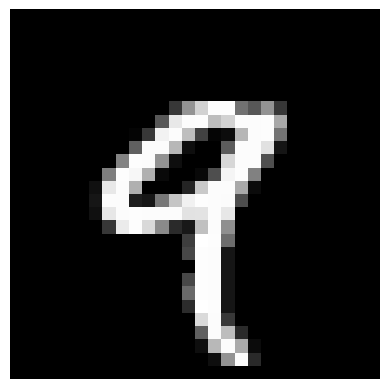

In [6]:
#Prints the first 5 images of the dataset
import matplotlib.pyplot as plt

for i in range(5):
    image = X[i].reshape(28, 28)
    plt.imshow(image, cmap="grey")
    plt.axis('off')
    plt.show()

In [7]:
# Normalize images from (0,255) pixel range 0 indicating black and 255 indicating white to [0, 1] range as Neural Networks converge better in this range
X = X/255.0


In [8]:
# This check ensures that the X is normalized [0, 1] range as it is observed the max pixel value is 1 and min pixel value is 0 
print(X[50000][:40])
print(X.min())
print(X.max())

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0
1.0


In [9]:
# One Hot Encoding is to be done since the models dont really work with raw labels therefore it needs to be converted to a OHE Vector as in 
# for vector y = 5, its OHE representation will be [0,0,0,0,0,1,0,0,0,0]
from sklearn.preprocessing import OneHotEncoder
print("Dataset y type", type(y[0])) #Type was  string
#Since the y i.e, the class labels are in String type so we typecast the string labels to int labels for OHE
y = y.astype(int)
print("Updated y type", type(y[0])) # Type became int
encoder = OneHotEncoder(sparse_output=False)
print("Dimensions of original y array", y.ndim)
print("Shape of original array", y.shape) # Y is a 1D array (70000,)
#As y is a 1D array, it is not possible to do OHE on it directly, therefore we somehow need to convert it to a 2D array
#Since the shape of the y is (70000,), its 1D, therefore we can just append a 1 to it simply to make it a 2D array OHE can run on it. Thats what the next line does
y = y.reshape(-1, 1)
print("Dimensions of updated y array", y.ndim) 
print("Shape of new array", y.shape)# Now Y is a 2D array (70000,1)
encoder = OneHotEncoder(sparse_output=False)
y_hot = encoder.fit_transform(y)
print("Original label", y[0])  
print("OHE label", y_hot[0])






Dataset y type <class 'str'>
Updated y type <class 'numpy.int64'>
Dimensions of original y array 1
Shape of original array (70000,)
Dimensions of updated y array 2
Shape of new array (70000, 1)
Original label [5]
OHE label [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
# Next we will do the train test split of the dataset. We will perform a 80-20 split of the dataset. 80% of the data will be sent for training and 20% will be sent for testing.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y_hot, test_size=0.2, random_state=42)
print("X train shape", X_train.shape)
print("X test shape", X_test.shape)
print("y train shape", y_train.shape)
print("y test shape", y_test.shape)

X train shape (56000, 784)
X test shape (14000, 784)
y train shape (56000, 10)
y test shape (14000, 10)


In [11]:
#Till now the data preprocessing stage is done, some of the steps to summarize which were done are:
# 1. Fetching the MNIST dataset.
# 2. Normalizing the pixel values to [0, 1] range.
# 3. One Hot Encoding the labels. (Also involved the conversion of labels from string to int + reshaping the labels to 2D array for OHE compatibility)
# 4. Splitting the dataset into training and testing sets.

In [12]:
# This is the architecture of the Neural Network that will be implemented:
# 2 Layer Neural Network
 
#        Layer                            Size                                   Activation Function
#     Input Layer            784 (28x28 pixels flattened)                                ----
#     Hidden Layer                        128                                           ReLU
#     Output Layer                         10                                           Softmax
 

In [13]:
#We first define the structure of the NN. As discussed above, the Input Size is 784 (28x 28 pixels flattened), Hidden Layer size is 128 it can be adjusted to any value and output size is 10 (0-9 digits)
input_size = 784
hidden_size = 128
output_size = 10

In [14]:
# We will define the weights and biases for the network.
# Initialization matters a lot in NNs, so we will be using the "He initialization" method for the weights.
# The formula for He initialization is:
# Var(W) = 2 / n_in, where n_in is the number of inputs to the layer.
# It is commonly used for ReLU activation functions . Given the rigid nature of ReLU, it is important as it provides kind of a compensation since ReLU nearly zeroes out 50% of the inputs.


In [15]:
#Weights and biases from the input layer to the hidden layer
W1 = np.random.randn(hidden_size, input_size) * np.sqrt(2 / input_size) # Standard deviation is square root of variance.
b1 = np.zeros((hidden_size, 1)) # Let's initialize the bias value of each hidden neuron to 0


In [16]:
#Weights and biases from the hidden layer to the output layer
W2 = np.random.randn(output_size, hidden_size) * np.sqrt(2/ hidden_size)
b2 = np.zeros((output_size,1))

In [17]:
print(W1.shape) #Weights from the input Layer to the hidden Layer but written as (hidden_size, input_size) (128, 784)
print(b1.shape) #Biases for 128 hidden neurons (128,1) 1 means it's applied to a single input.
print(W2.shape) # Weights from the hidden layer to the output layer but written as (output_size, hidden_size) (10, 128)
print(b2.shape) # Biases for 10 output neurons (10,1)



(128, 784)
(128, 1)
(10, 128)
(10, 1)


In [ ]:
# Mathematical Definition of ReLU Activation Function:
# ReLU is defined as:
# ReLU(x) = max(0,x)
# ReLU'(x) (Derivative of ReLU) = 1 if x > 0 else 0

def relu(Z):
    return np.maximum(0,Z)

def relu_derivative(Z):
    return (Z > 0).astype(float)
# The return function of ReLU derivative is exactly how the actual ReLU derivative activation function is defined. Let's understand it with an example:
# Supppose Z = [-2, 0, 3], Z > 0 creates a boolean array [False, False, True] now we have to convert it to values like 0 and 1, therefore we use astype (float) which converts the boolean array
# to [0.0, 0.0, 1.0] which is exactly the ReLU derivative activation function for the given Z. 
    
 

In [33]:
# ReLU activation function and its derivative function check for random np array.
Z = np.array([[-2, 0, 3]])
print("Z Shape: ", Z.shape)
print("After applying ReLU Activation Function: ", relu(Z))
print("After applying ReLU Derivative Activation Function: ", relu_derivative(Z))

Z Shape:  (1, 3)
After applying ReLU Activation Function:  [[0 0 3]]
After applying ReLU Derivative Activation Function:  [[0. 0. 1.]]


In [ ]:
#Mathematical Definition of Softmax Activation Function:
# Softmax is defined as:
# Softmax(z(i)) = e ^ (z(i) - max(z)) / summation(e ^ (z(j) - max(z))) for all j

#Why SoftMax?
# Softmax is commonly used in the output layer of the multi class classification problems as it converts the raw scores into probabilities that sum up to 1.
# The subtraction of max(z) is done to prevent overflow issues when computing the exponentials, as it can grow huge for large values of Z. So its incorporated in the formula itself. 

def softmax(Z):
    Z_stable = Z - np.max(Z, axis=0, keepdims=True) # This is the ( z(i) - max(z) ) part of the softmax expression in the numerator, axis = 0 implies we are doing for each row  which means each column is treated as a sample and keepdims = True ensures the output has the same dimeensions as output.
    exp_Z = np.exp(Z_stable) # We have raised the expression to the power of e, these two steps comprise the numerator of the expression
    softmax_output = exp_Z / np.sum(exp_Z, axis=0, keepdims=True) # This is the entire softmax expression 
    return softmax_output



In [31]:
#Softmax activation function check for random np array.
Z = np.array([[-2, 0, 3]]).T
print("After applying Softmax Activation Function: ", softmax(Z))


After applying Softmax Activation Function:  [[0.00637746]
 [0.04712342]
 [0.94649912]]


In [35]:
# Now we implement the forward pass of the NN
# Given the input X, weights W1 and W2, corresponding biases b1 and b2, the forward propagation is defined as follows:
# Z1 = W1 * X + b1
# A1 = ReLU(Z1)
# Z2 - W2 * A1 + b2
# A2 = Softmax(Z2)
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [ ]:
# We define the cross-entropy loss function for the output layer.
# The cross-entropy loss function is defined as:
# Loss = - summation (i = 1 to C) (y (i)) * log(y'(i)) for all i where y(i) is the true label and y'(i) is the predicted probability by softmax for the sample of a given class i. For more than 1 sample,  we divide it by 'm', where 'm' is the total number of samples, so formula becomes:
# Loss = -1/m * summation (j = 1 to m) (i = 1 to C) (y (i)) * log(y'(i)) for all i
# If you would manually like to compute, its basically you are considering the only the true labels with value of 1 and multiplying with its corresponding log of predicted probability and summing it up over all examples. 

def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0] # Why shape[0] ? Because the losses are computed over the number of samples, and number of samples corresponds to axis = 0, which spans through all the rows.
    loss = -1/m * np.sum(y_true * np.log(y_pred + 1e-8)) # We added a small epsilon value of 1e-8 so that we do not run into log 0 and crash training.
    return loss


In [ ]:
y_true = np.array([[0, 0, 1, 0, 0, 0]])
y_pred = np.array([[0.1, 0.8, 0.2, 0.1, 0.1, 0.1]])
print(y_true.shape[1])  # General rule is shape[1] gives the number of columns which corresponds to the number of classes
print(y_pred.shape[1])
print(y_true.shape[0])  # General rule is shape[0] gives the number of rows which corresponds to the number of samples
print(y_pred.shape[0])
#But Cross-Entropy Loss is computed over the number of samples, therefore we use shape[0] for y_true and y_pred
print("Cross-Entropy Loss: ", cross_entropy_loss((y_true), (y_pred)))


6
6
1
1
Cross-Entropy Loss:  1.6094378624341017
